# Oblig - Titanic (frist 14. februar)

Etter å ha fullført denne obligen skal studenten kunne
- Lese inn og behandle kategoriske data i pandas
- Implementere logistisk klassifikasjon
- Benytte og beskrive beslutningstrær

Denne obligen skal fungere som en øvelse på maskinlæring anvendt på kategoriske data. Dere skal gjennom forbereding av data med pandas og scikit-learn, og så tilpasning av dataene med logistisk klassifikasjon og beslutningstrær. Logistisk klassifikasjon for å få erfaring med å gjøre maskinlæring fra grunnen av, beslutningstrær for å få erfaring med et sentralt verktøy i maskinlæring som brukes i f.eks XGbBoost, som er en av dagens ledende maskinlæringsalgoritmer.

Dataene dere skal se på inneholder informasjon om passasjerene på Titanic, inkludert om de overlevde katestrofen eller ikke. Målet er å lage algoritmer som kan predikere om en gitt person på titanic overlevde eller ikke, og å se hvilke personlige egenskaper som var "avgjørende".

For å begynne på oppgaven følger du lenken fra [denne siden](https://www.uio.no/studier/emner/matnat/fys/HON2200/v23/undervisningsmateriell/oblig-.html). Der får du tilgang til et start-repository som inneholder dataene du skal bruke. 

Gjennom hele obligen har vi gjort det slik at vi først gir oppgavene, og under gir vi en del hint og forklaringer på hvordan de kan løses. Det betyr at om du står fast, kan det være lurt å lese litt lenger nedover på siden. 

I tillegg til å gjøre de statistiske analysene vi ber om kreve vi også at besvarelsen er godt kommentert. Det holder altså ikke bare å levere et dokument som inneholder riktig kode, tall og figurer, du må også beskrive og diskutere resultatene. 

## Lesing og behandling av kategoriske data i pandas

**Oppgave 1:**

**a)** Les datasettet ("train.csv") med pandas. Se på dataene! Finn ut hva kolonnene betyr.

**b)** Håndter de manglende dataene for alder.

**c)** Gjør de kategoriske dataene du vil benytte brukbare ved å gjøre en one hot encoding.

**d)** Samle kolonnene du vil bruke til å predikere overlevelse i en dataframe/array `X`. Samle overlevelses-kolonnen i en annen dataframe/array `Y`. Under er det vist hvordan dere kan hente ut kolonner til en egene variable.
- `X = df[["Alder", "Kjønn"]]`
- `Y = df["Lønn"]`

**e)** Del dataenne videre inn i trening og test data. Se dokumentasjonen for sckikitlearn sin train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

### Få oversikt over dataene

Man bruker som regel [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) når man leser data med pandas. Da får man et objekt av typen [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). For å få denne printet pent i en notebook kan man enten avslutte en celle med dataframe objektet, eller bruke `display()` funksjonen (ikke `print()`, det blir stygt).

Manglende data er et stort problem i dataanalyse, og har mange løsninger med egne ulemper og fordeler. I dette datasettet er det mye manglende data for alder og kabin. Du kan få en rask oversikt over manglende data med kodesnutten

```
display(df.isnull().sum())
```

Manglende data (her NaN verdier) gjør at maskinlæringsalgoritmene feiler. Den enkleste løsningen er å fjerne alle rader med manglende data. Dette kan man f.eks gjør med koden
```
df = df.dropna(subset=["Age"])
```
Men, når vi allerede jobber med så lite data er det en stor kostnad å bare kaste bort så mye. En annen løsning er å fylle inn manglende verdier med gjennomsnittlig alder for kombinasjonen av kjønnet og klassen personen har. Om denne dataen vi fyller inn gjør mer godt enn skade vil variere fra dataset til dataset. Dere velger selv hvordan dere vil håndtere manglende data.
```
df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
```

### Kategorisk data og train-test split

Kategorisk data er data som ikke skal bli tolket som en numerisk verdi. Maskinlæringsalgoritmer skjønner seg kun på numeriske verdier, så dette fører til et problem. Eksempler på kategorisk data kan være nasjonalitet og telefonnummer. Når en maskinlæringsalgoritme ser telefonnummerene 12345678, 23456789 og 34567891 vil den prøve å finne en sammenheng basert på størrelsen til tallene, selv om det ikke gir mening. Og når den ser ordet "Norge", får du en feilmelding.

Løsningen er å gi hver enkelt mulige verdi av de kategoriske dataene sin egen kolonne. Kolonnen vil da inneholde nuller og enere som forteller om man hører hjemme i den kategorien eller ikke. En kolonne `Norge` kan da ha en null hvis personen ikke kommer fra Norge, eller et ett-tall hvis personen kommer fra Norge. Dette kalles one hot encoding. Dette gjør man i pandas med metoden [.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Hvis kolonnene `Nasjonalitet` og `Telefonnummer` skal bli gjort om til en one-hot kolonner gjøres det slik:
```
categorical_cols = ["Nasjonalitet", "Telefonnummer"]
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_')
```
Merk at kategoriske data som navn og telefonnummer ikke er særlig nyttige, spesielt når du ender opp med en kolonne for hver person.

Når manglende og kategorisk data er tatt hånd om, er neste steg å samle de dataene man skal bruke til å gjøre prediksjoner, og de dataene som man prøver å predikere. Man tar ut kolonner av en dataframe ved å bruke hakeparanteser og navnet på kolonnen, eller en liste med navnene på kolonnene man vil ta ut.
```
X = df[["Nasjonalitet_Norge", "Nasjonalitet_Sverige", "Alder"]]
Y = df["Lønn"]
```
Til slutt må man dele opp dataene i trening og test data. Algoritmene blir trent på treningsdata, og så ser vi hvor godt de funker ved å teste de på test data. Vi anbefaler sterkt å bruke scikit-learn sin [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Det er typisk å bruke rundt 20% av dataen som test-data.

## Logistisk Klassifikasjon
Denne oppgaven kommer i to versjoner: Én for dem som går på realgasprogrammet og en for dem som går på humanioraprogrammet. Det kommer av at realfagsversjonen krever forkunnskaper tilsvarende MAT1110. 

**Oppgave 2 - Bruk av scikitlearn [HUMANIORA]:**

**a)** Plott sigmoidfunksjonen (den logistiske funksjonen). Hva gjør denne funksjonen godt egnet til å "svare" på ja/nei spørsmål?

**b)** Tren scikitlearn sin logistisk klassifikasjons modell. Følg kodeeksempelet funnet her: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Der hvor det står `X[:2, :]` kan dere skrive `X_train` siden vi skal bruke hele trenings arrayet.
- Hvis dere får en advarsel `failed to converge` går det fint. Det betyr bare at modellen tror den kunne gjort det en del bedre ved å bli trent lengre eller hvis treningsdataene hadde vært bedre tilrettelagt. Dere trenger ikke å prøve å rette opp i dette her, siden modellen sannsynligvis funker godt nok til å vise at den funker.

**c)** Test logistisk klassifikasjon modellen. Dere kan bruke `clf.score()` til å se hvor stor andel riktige modellen hadde.

**d)** Bruk funksjonen `confusion_matrix` fra `sklearn.metrics` til å finne ut i hvilken grad modellen produserer sanne positive, sanne negative, falske positive og falske negative prediksjoner. 

**Oppgave 2 - Fra grunnen [REALFAG]:**

**a)** Plott sigmoid funksjonen. Hva gjør denne funksjonen godt egnet til å "svare" på ja/nei spørsmål?

**b)** Implementer logistisk klassifikasjon og tren modellen.
- Sett opp vekter (array med like mange tall som input) og bias (ett tall)
- Regn ut output. Multipliser trenings-input (X) med vektene, legg til bias, og mat gjennom sigmoid funksjonen. (Deler av kode under)
- Regn ut gradienter. (Kode under)
- Oppdater vekter. (Formler under)

Viktig i alle program med vektorer og vektorprodukter: Få oversikt over dimensjonene til alle variablene i programmet ditt. Er noe et tall, vektor eller matrise(har flere rader og kolonner)? `print()` alt du er usikker på, og `print()` `.shape` egenskapen for å se størrelsen på ting. Gjør dette underveis mens du skriver programmet, men unngå alt unødvendig i det fullførte programmet.

**c)** Test logistisk klassifikasjon modellen på test-dataen ved å ta testing-input (X) gjennom input-prosedyren over og sammenlign med test output (Y).

Videoen under gir en oversikt over logistisk klassifikasjon. Merk at det i videoen blir lagt vekt på mange statistiske sider ved logistisk klassifikasjon som vi ikke vil gå nærmere inn på her. Den kan allikevel hjelpe med å forstå hvordan vi kan bruke en logistisk funksjon til å si hvor sannsynlig det er at et datapunkt hører til en av to kategorier, og at vi vil finne den linjen som passer best til dataene (den modellen som med størst sannsynlighet kunne produsert dataen).

<iframe width="560" height="315" src="https://www.youtube.com/embed/yIYKR4sgzI8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Overordnet struktur

Her kommer det en del formeler og teori, men det viktigste er å forstå de overordnede ideene, som skal være overkommelig. Programmet dere skal skrive vil ha en slik struktur:

```
Lag vekter og bias

for i in range(iterasjoner):
    Regn ut output (ved hjelp av vekter og bias)
    
    Regn ut gradienter (ved hjelp av output)
    
    Oppdater vekter og bias (ved hjelp av gradienter)
```

En logistisk modell, som alle andre modeller, tar inn en input og gir en output. Vi kaller input til modellen $\textbf{x}$, det representerer alle egenskapene til en passasjer. De ulike egenskapene som $\textbf{x}$ inneholder kaller vi $x_1$, $x_2$, osv. Om passasjeren overlever eller er ikke, som er det vi prøver å predikere, kaller vi $y$. Det modellen predikerer kaller vi $\hat{y}$ ("y hatt"). Først ser vi kun på en og en passasjer, senere regner vi med mange passasjerer, for å finne gjennomsnitt og slikt.

### Output til modellen

Den logistiske modellen inneholder vekter $W$ og en bias $b$, som bestemmer hvordan input $\textbf{x}$ blir om til output $\hat{y}$. Det skal være like mange vekter som egenskaper, og bias skal være et tall. Disse begynner vanligvis med tilfeldige verdier, og kan i Python bli laget med [np.random.randn()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) og [np.random.rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html).

De ulike vektene ganges komponentvis med de ulike egenskapene, og blir så lagt sammen med bias:

$$
\begin{equation*}
\begin{aligned}
z = b + w_1 x_1 + w_2 x_2 + \dots + w_m x_m = W \textbf{x} + b
\end{aligned}
\end{equation*}
$$

Dette kan vi gjøre som et vektorprodukt i Python. Merk at vi kan gange vektene med alle egenskapene til ALLE passasjerene på en gang! Dette gjør alt mye mer kompakt: (Vi bruker `@` for matrise og vektorprodukt i Python)

```
z = X_train @ W + b
```

Alt dette ($z$) blir så matet gjennom en sigmoid funksjon, som er definert slik:

$$
\begin{equation*}
\begin{aligned}
\hat{y} = \sigma (z) = \frac{1}{1 + e^{-z}}
\end{aligned}
\end{equation*}
$$

````{admonition} Hvorfor får jeg overflow feil av og til?
:class: toggle
Det finnes to likegyldige definisjoner av sigmoid funksjonen:

$$
\begin{equation*}
\begin{aligned}
\sigma (z) = \frac{1}{1 + e^{-z}} = \frac{e^{z}}{1 + e^{z}}
\end{aligned}
\end{equation*}
$$

Begge to gir akkurat samme svar, men datamaskiner behandler de to ulikt for veldig store positive og negative tall (fordi utregningen vil inkludere tall som er for store til å behandles av datamaskinen). Den første definisjonen fører til utregningen av $e^{STORTTALL}$ for store *negative* verdier for $z$, som fører til overflow(alt for store tall for datamaskinen). Den andre definisjonen fører til utregningen av $e^{STORTTALL}$ for store *positive* verdier for $z$, som fører til overflow. En måte å programmere en stabil sigmoid funksjon som benytter riktig definisjon til riktig tid er gitt under. `np.where()` er en slags effektiv `if` for utregninger. Å bruke en vanlig `if` til å bruke riktig sigmoid definisjon vil gjøre at man ikke kan bruke funksjonen til vektoriserte utregninger (som å bruke sigmoid funksjonen på en hel vektor på en gang).

```
def sigmoid(z):     #hvis?           True                False 
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
```

````

Merk at når man gjør disse operasjonene på `X_train` som inneholder egenskapene til alle passasjerene, blir $\hat{y}$ en vektor som inneholder prediksjonene for alle passasjerene, og ikke bare for én.

Siden hele modellen kun består av ett sett vekter, en bias og en sigmoid, kan en logistisk modell bli sett på som et nevralt nettverk med kun én node. Hvis modellen tar fem inputs kan man tegne den slik:

![title](Figures/lognet.JPG)

### Cost funksjonen og gradient 
Modellen gjør sannsynligvis en veldig dårlig jobb i å predikere noe som helst, siden vektene og bias kun er tilfeldige tall så langt. Vi samler vektene og bias i en variabel $\theta$ for å gjøre ligningene mer kompakt, $\theta$ er da bare parametrene til modellen vår. Før vi kan få modellen vår til å gjøre en bedre jobb, må vi bestemme hva en bedre jobb *betyr*. Vi bestemmer at modellen vår er bedre jo mindre [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) den har. Denne formelen for cross entropy er litt tung å forstå, bare vit at hvis modellen vår predikerer mye riktig får den lavere cross entropy, ellers får den høyere cross entropy. Indeksen $i$ i uttrykket forteller hvilken passasjer vi ser på, $\sum$ tegnet sier at vi summerer verdiene for alle passasjerer. Denne formelen skal du **ikke** bruke i programmet ditt.

$$
\begin{equation*}
\begin{aligned}
C(\theta) = - \frac{1}{n} \sum_{i=1}^{n} [y_i log(\hat{y}_i) + (1 - y_i) log(1 - \hat{y}_i)]
\end{aligned}
\end{equation*}
$$

```{admonition} Hva er motivasjonen bak cost funksjonen?
:class: toggle
Modellen vår vil predikere enten 0 eller 1 (i praksis vil den under trening gi et tall *mellom* 0 og 1 som er sannsynligheten for at den vil predikere 1). Sannsynligheten for at den predikerer 1 gitt en input $\textbf{x}_i$ og parametre $\theta$ er $p(y_i=1 | \textbf{x}_i , \theta)$. Sannsynligheten for at den predikerer 0 gitt en input $\textbf{x}_i$ og parametre $\theta$ er $1 - p(y_i=1 | \textbf{x}_i , \theta)$. For hver $\textbf{x}_i$ er da sannsynligheten for at den predikerer *riktig* det du ser i ligningen under, hvis du ignorerer $\prod$ tegnet. $\prod$ tegnet gjør at vi ganger sammen disse sannsynlighetene for alle $\textbf{x}_i$ i datasettet, så vi ender opp med sannsynligheten for at modellen predikerer alle datapunkter $y_i$ riktig.

$$
\begin{equation*}
\begin{aligned}
P(D | \theta) = \prod_{i=1}^{n} [p(y_i=1 | \textbf{x}_i , \theta)]^{y_i} [1 - p(y_i=1 | \textbf{x}_i , \theta)]^{1-y_i}
\end{aligned}
\end{equation*}
$$

Vi ønsker å maksimere sannsynligheten for at modellen predikerer alle datapunktene riktig, så vi prøver å finne $\theta$ slik at verdien av forrige ligning blir størst mulig. Vi kan trikse litt med ligningen for å gjøre dette enklere. Vi tar noe som heter log-likelihood av ligningen, og setter på en minus. Ved en del ekstra triksing ender vi opp med cost funksjonen, som vi nå ønsker å *minimere*, på grunn av minustegnet.

```

Vi vil velge parametre $\theta$ slik at $C(\theta)$ blir så liten som mulig. Dette gjør vi ved å finne den deriverte av $C(\theta)$ og bruke den deriverte til å bevege parametrene $\theta$ nærmere de som tilsvarer bunnen av $C(\theta)$, dette kalles gradient descent. Tenk at du står i en dal og vil finne bunnen, da beveger du deg helst nedover i den retningen det er brattest. De deriverte av $C(\theta)$ med hensyn på $W$ og $b$ viser seg å bli:

$$
\begin{equation*}
\begin{aligned}
\frac{\partial C(\theta)}{\partial w_k} = - \frac{1}{n} \sum_{i=1}^{n} \textbf{x}_{i,k} (y_i - \hat{y}_i)
\end{aligned}
\end{equation*}
$$

$$
\begin{equation*}
\begin{aligned}
\frac{\partial C(\theta)}{\partial b} = - \frac{1}{n} \sum_{i=1}^{n} y_i - \hat{y}_i
\end{aligned}
\end{equation*}
$$

I python kan man bruke likhetene i uttrykkene til å spare litt beregninger, vi lager et mellomledd `delta` som er gjennomsnittlig forskjell mellom $y$ og $\hat{y}$:

```
delta = -(Y_train - y_hat) / n
    
dCdW = X_train.T @ delta
dCdb = np.sum(delta, axis = 0)
```

De deriverte peker i retningen hvor $C(\theta)$ øker raskest, så vi vil endre parametrene med *minus* den deriverte. Den deriverte er ofte for stor, som betyr at når vi endrer på parametrene får vi bare søppel, se figur under. For å faktisk nærme oss bunnen av $C(\theta)$ må vi dermed velge riktig læringsrate $\gamma$, som vi bruker til å skalere("krympe") gradienten. Å finne en god læringsrate er enda et stort spørsmål med mange ulike løsninger i maskinlæring. 0.001 med 10000 iterasjoner funker ok her. Dette er hvordan man oppdaterer vektene og bias ved hjelp av de deriverte og læringsraten:

$$
\begin{equation*}
\begin{aligned}
W &= W - \gamma \frac{\partial C(\theta)}{\partial W} \\
b &= b - \gamma \frac{\partial C(\theta)}{\partial b}
\end{aligned}
\end{equation*}
$$

![title](Figures/gradientlr.png)
    
*Figur av Jeremy Jordan fra <https://www.jeremyjordan.me/nn-learning-rate/>*

### Testing av modellen

Når du skal bruke modellen til å gjøre faktiske prediksjoner må du finne $z$ og $\hat{y}$ for test dataen, men rund av tallene slik at $\hat{y}$ bare får nuller og enere. [np.round()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html) kan runde av hele arrays. Så må du finne hvor stor andel av prediksjonene som var riktige. scikit learn sin [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) anbefales. Se hvilken accuracy en modell som antar at alle dør får for å sammenligne. Du kan forvente en accuracy på rundt 75% for modellen din.

## Beslutningstrær

**Oppgave 3:**

**a)** Lag et tre med maksdybde 3 som tilpasser treningsdataene.

**b)** Test treet på testdataene.

**c)** Plot treet og beskriv med ord hva alle forgreningene sier, og hvilke personer treet sier vil overleve.

**d)** Se hvordan maksdybden til treet påvirker hvor godt treet klassifiserer testdataene.

### Scikit-learn Beslutningstrær

Beslutningstrær fungerer på en helt annen måte enn logistiske modeller eller nevrale nettverk. Istedenfor å justere mange vekter litt og litt med gradienter, finner beslutningstrær ja/nei spørsmål som best skiller dataene inn i kategoriene man er ute etter. I Titanic eksempelet finner treet de spørsmålene som best skiller de som overlever fra de som dør. Et slikt spørsmål kan f.eks være om en passasjer er en kvinne, eller om de er yngre enn 50 år. For hvert slikt spørsmål får treet to nye grener, en for ja og en for nei. På hver av disse grenene kan man igjen stille nye spørsmål og få enda flere grener som bedre grupperer dataene.

Når man trener et beslutningstre på data kan man alltid la treet stille så mange spørsmål det bare vil, slik at det kan gruppere alle dataene riktig. Da kan man ende opp med et tre hvor omtrent hvert eneste datapunkt har sin egen forgrening, og treet ikke har noen "overordnede mønstre" det grupperer dataene etter. Treet vil da ha et overtilpasnings("overfitting") problem som vil føre til at det presterer dårlig på å klassifisere data det aldri har sett før. Dette kan unngås ved å begrense antall forgreninger treet kan ha, eller maks-dybden til treet.

Dere skal bruke [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#classification) modellen til scikit-learn. Følg eksempelet i dokumentasjonen(linken til venstre), og lag et tre med maks dybde 3. Bruk scikit learn sin [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for å teste modellen. For å plotte treet anbefaler vi

```
plt.figure(figsize=(16,10))
tree.plot_tree(model, max_depth=3, feature_names=X_train.columns, class_names=["Dead", "Alive"], filled=True)
plt.show()
```

Videoen under går gjennom hvordan beslutningstrær fungerer i mer detalj, inkludert hvordan treet velger hva som best deler dataene.

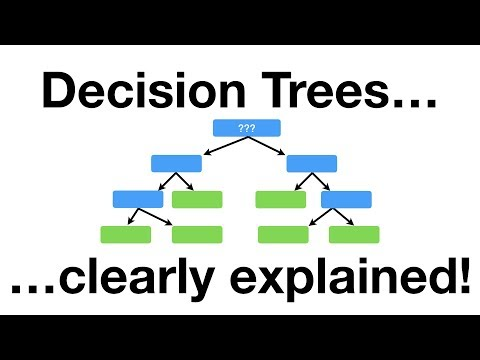

In [17]:
from IPython.display import YouTubeVideo

YouTubeVideo('7VeUPuFGJHk', width=800, height=300)

## Frivillig oppgave: XGBoost modell
*Denne oppgaven er valgfri!*

**Oppgave 4:**

**a)** Lag et xgboost modell som tilpasser treningsdataene.

**b)** Test modellen på testdataene.

**c)** Plot "feature importance" og "partial dependance". Hva sier plottene om hva som var avgjørende for om noen overlevde?

**d)** Kan man ut ifra plottene vite hva xgboost modellen vil predikere for en spesifikk person? Hvor godt kan man forstå hvordan en slik modell fungerer? Hva med et beslutningstre, eller en logistisk modell?

### XGBClassifier

Små beslutningstrær er gode til å tilpasse et par enkle sammenhenger, men ikke mer inviklede sammenhenger i dataene. Større trær er ikke en god løsning på dette, siden de fører til overtilpassing av dataene. En bedre løsning på problemet er å bruke flere små trær til å tilpasse dataene, og så bruke (det vektede) gjennomsnittet av hva trærne predikerer som endelig output. En metode som heter random forest lager mange trær som tilpasser ulike deler av dataene **uavhengig av hverandre**. Denne metoden fungerer utmerket, men er ikke den vi skal se på.

Metoden vi skal se på heter gradient boosting, hvor man først lager et lite beslutningstre, og så ser man på feilene det treet gjør. Man lager så enda et lite tre som fokuserer på å rette opp feilene til det forrige treet. Etter dette lager man enda et lite tre som retter opp feilene til de to forrige trærne lagt sammen osv. osv. Metoden heter gradient boosting fordi man regner ut gradienter til å rette opp feilen til de forrige trærne, og boosting fordi man bruker mange enkle modeller til å lage en god modell. XGBoost har en egen introduksjon til gradient boosting med trær [her](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

XGBoost er et Python(og mange andre språk!) bibliotek som implementerer gradient boosting. Det er flere måter å sette opp xgboost modeller, og python dokumentasjonen er ikke den beste. Vi anbefaler her å bruke [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier), siden denne funker godt med scikit-learn funksjoner dere skal bruke. Med den definerer, trener og bruker vi modeller slik. `n_estimators` er antall trær som skal trenes i modellen.

```
model = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 3, objective = "binary:logistic", n_estimators = 1000)
model = model.fit(X_train, Y_train)

Y_mdl = model.predict(X_test)
```

Siden xgboost modeller består av mange små trær kan vi ikke bare plotte ett tre og forstå hvordan hele modellen fungerer når den predikerer om noen vil overleve eller dø. En måte å forstå modellen er [plot_importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.plot_importance) funksjonen. Den lar oss se hvilke parametre som var "viktigest" under trening. Et mål vi kan velge å vise for dette er gain. Gain viser hvor mye feilen til modellen ble minket under trening av hver parameter. Så hvis det å inkludere en beslutning basert på kjønn minket feilen mye, øker gain for kjønn.

```
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
gain = model.get_booster().get_score(importance_type="gain")
for key in gain.keys(): # Dette er kun for å runde av tall så det blir mer lesbart
    gain[key] = round(gain[key], 2)
ax = xgb.plot_importance(gain, ax=ax, importance_type="gain", xlabel="Gain")
```

En annen måte å forså xgboost modellen er [plot_partial_dependence()](https://scikit-learn.org/stable/modules/partial_dependence.html) funksjonen. Den viser gjennomsnittlig output modellen vil gi hver verdi at parameteren du ser på. Den kan f.eks vise gjennomsnittlig sjanse for å overleve for hver alder.

```
features = ["Sex_female", "Pclass", "Age"]

plot_partial_dependence(model, X_train, features)
plt.gcf().set_size_inches(15, 6)
plt.show()
```

Denne videoen går gjennom hvordan xgboost lager de små trærne i modellen, inkludert en grundigere forklaring av gain. Selv om vi driver med klassifikasjon her, er ideene veldig like (om du har tid kan du også se videoen om [hvordan xgboost håndterer klassifikasjon](https://www.youtube.com/watch?v=8b1JEDvenQU)). Selv om gradienter ikke blir nevnt noe særlig i videoen, er det fortsatt gradienter som fører til reglene for valg av som brukes i videoen ([se del 3 av videoserien](https://www.youtube.com/watch?v=ZVFeW798-2I)).

<iframe width="560" height="315" src="https://www.youtube.com/embed/OtD8wVaFm6E" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>